In [4]:
import pandas as pd
import numpy as np
import tensorflow



In [5]:
data = pd.read_csv("/content/drive/MyDrive/spam.csv/spam.csv")

In [6]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
data=data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [9]:
data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)

In [10]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
data["Message Length"]=data["Message"].apply(len)

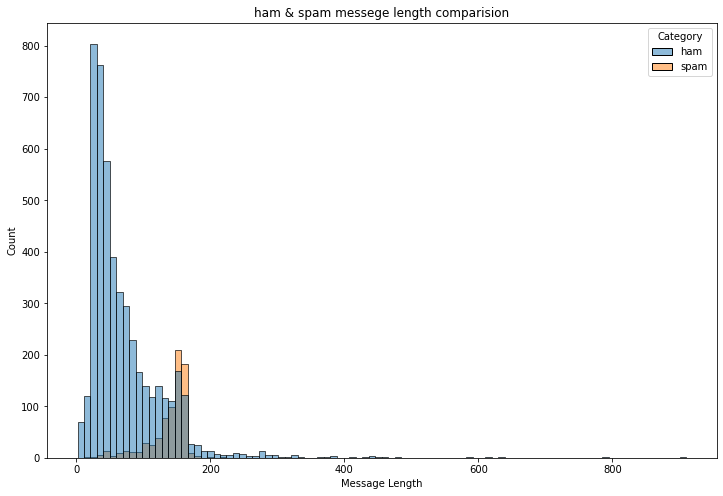

In [14]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [15]:
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count    4825.000000
mean       70.927047
std        58.001652
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
************************************
Spam Message Length Description:
 count    747.000000
mean     138.390897
std       29.041107
min       13.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: Message Length, dtype: float64


In [16]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5163,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,79.971464
std,NaN,NaN,59.619602
min,NaN,NaN,2.000000
25%,NaN,NaN,35.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


In [17]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

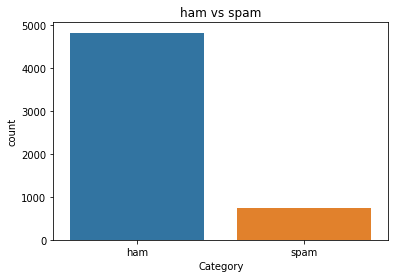

In [18]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [19]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


In [20]:
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])
minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
df=data.loc[undersampled_indices]
df=df.sample(frac=1)
df=df.reset_index()
df=df.drop(
    columns=["index"],
)


In [21]:
df.shape

(1494, 3)

In [22]:
df["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

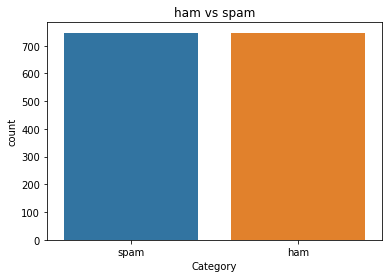

In [23]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [24]:
df.head()

,Category,Message,Message Length
0,spam,it to 80488. Your 500 free text messages are v...,74
1,spam,YOU 07801543489 are guaranteed the latests Nok...,158
2,ham,Thanks for ve lovely wisheds. You rock,38
3,ham,"Aight, lemme know what's up",27
4,spam,"Thanks for your ringtone order, reference numb...",156


In [25]:
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [26]:
df.head()

,Category,Message,Message Length,Label
0,spam,it to 80488. Your 500 free text messages are v...,74,1
1,spam,YOU 07801543489 are guaranteed the latests Nok...,158,1
2,ham,Thanks for ve lovely wisheds. You rock,38,0
3,ham,"Aight, lemme know what's up",27,0
4,spam,"Thanks for your ringtone order, reference numb...",156,1


In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
corpus=[]
for message in df["Message"]:
    message=re.sub("[^a-zA-Z]"," ",message)
    message=message.lower()
    message=message.split()
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    message=" ".join(message)
    corpus.append(message)

In [36]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [37]:
df["Message Length"].describe()

count    1494.000000
mean      104.323293
std        61.413845
min         3.000000
25%        49.000000
50%       115.000000
75%       152.000000
max       910.000000
Name: Message Length, dtype: float64

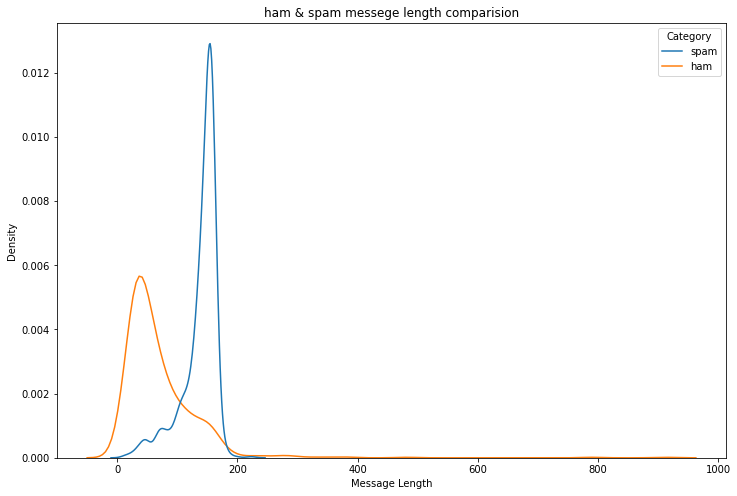

In [38]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [40]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [41]:
df_final=pd.concat([extract_features,target],axis=1)

In [42]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4572,1644,3415,6287,4366,1
1,0,0,0,0,0,0,0,0,0,0,...,6467,3993,4463,3400,7700,2252,373,558,1922,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1107,154,8417,3866,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8745,8039,231,0
4,0,0,0,0,0,0,0,0,0,0,...,7780,8468,678,6622,1999,4557,7300,4197,6388,1


In [43]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_trainval,X_test,y_trainval,y_test=train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.15
)


In [46]:
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [47]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential


In [48]:
model=Sequential()

In [49]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [50]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [51]:
history=model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 15s 358ms/step - loss: 0.5525 - accuracy: 0.7199 - val_loss: 0.4256 - val_accuracy: 0.8482
Epoch 2/10
34/34 [==============================] - 12s 342ms/step - loss: 0.2427 - accuracy: 0.9360 - val_loss: 0.1273 - val_accuracy: 0.9634
Epoch 3/10
34/34 [==============================] - 12s 339ms/step - loss: 0.0877 - accuracy: 0.9722 - val_loss: 0.0881 - val_accuracy: 0.9738
Epoch 4/10
34/34 [==============================] - 12s 358ms/step - loss: 0.0410 - accuracy: 0.9907 - val_loss: 0.0827 - val_accuracy: 0.9686
Epoch 5/10
34/34 [==============================] - 12s 342ms/step - loss: 0.0229 - accuracy: 0.9954 - val_loss: 0.0694 - val_accuracy: 0.9738
Epoch 6/10
34/34 [==============================] - 14s 411ms/step - loss: 0.0150 - accuracy: 0.9963 - val_loss: 0.0615 - val_accuracy: 0.9738
Epoch 7/10
34/34 [==============================] - 12s 340ms/step - loss: 0.0131 - accuracy: 0.9981 - val_loss: 0.0703 - val_accuracy: 0.9686

In [52]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graph_acc(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

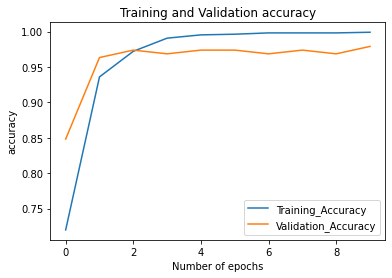

In [53]:
plot_graph_acc('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [54]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 1s 92ms/step


In [55]:
model.save('Spam_SMS_classifier.h5')

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:96.89%


array([[114,   3],
       [  4, 104]])

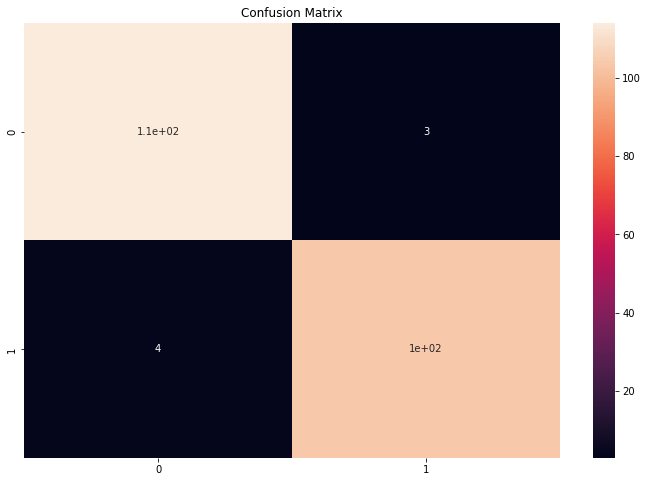

In [58]:
cm=confusion_matrix(y_test,y_pred)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

In [59]:
def classify_message(model,message):
    for sentences in message:
        sentences=nltk.sent_tokenize(message)
        for sentence in sentences:
            words=re.sub("[^a-zA-Z]"," ",sentence)
            if words not in set(stopwords.words('english')):
                word=nltk.word_tokenize(words)
                word=" ".join(word)        
    oneHot=[one_hot(word,n=vocab_size)]
    text=pad_sequences(oneHot,maxlen=sentence_len,padding="pre")
    predict=model.predict(text)
    if predict>0.5:
        print("It is a spam")
        print("predict score: ", predict[0][0])
    else:
        print("It is not a spam")
        print("predict score: ", predict[0][0])

In [60]:
message1="I am having my Tests right now. Will call back as soon as possible! Till then be safe wherever you are. Be Alert of any hazard"
message2="Your Rs.8850 welcome bonus is ready to be credited. Download Junglee Rummy now. Claim Bonus on your first deposit prize pool"


In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [63]:
classify_message(model,message1)

1/1 [==============================] - 0s 28ms/step
It is not a spam
predict score:  0.46551365


In [64]:
classify_message(model,message2)

1/1 [==============================] - 0s 28ms/step
It is a spam
predict score:  0.99806
